# Pytorch
- 구글의  Tensorflow와 유사한 딥러닝 라이브러리
- 페이스북 인공지능 연구팀에 의해 개발
- torch
    - 텐서 변화 및 다양한 수학 함수와 클래스가 들어가있다.
- torch.nn
    - 신경망을 구축하기 위한 레이어(층), 활성화 함수, 손실함수 등이 들어있다.
- torch.utils.data
    - 미니 배치 학습을 위한 데이터셋을 구성하는 클래스들이 들어가있다
- torch.optime
    - optimizer 관련 함수와 클래스가 있다.

In [ ]:
import torch
import numpy as np

# 텐서(Tensor)
- N차원 배열
- 텐서는 다차원 배열이나 행렬과 매우 유사한 특수한 자료구조
- pytorch에서는 텐서를 딥러닝 모델의 입력과 출력으로 학습을 진행


## 텐서 만들기
- tensor 함수
    - 입력 받은 데이터를 tensor 객체로 반환

In [ ]:
data = [
    [1,2,3],
    [4,5,6]
]

x= torch.tensor(data)
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
type(x)

torch.Tensor

In [ ]:
x.dtype

torch.int64

In [ ]:
arr = np.array(data)
torch.tensor(arr)

tensor([[1, 2, 3],
        [4, 5, 6]])

- Tensor 클래스
    - 입력받은 데이터를 텐서 객체로 변환
    - 어떤 타입이 들어와도 데이터 타입은 float32로 변경해준다.

In [ ]:
x = torch.Tensor(arr)
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

- 슬라이싱, 마스킹, 인덱싱

In [ ]:
x[:,1:]

tensor([[2., 3.],
        [5., 6.]])

- ones, zeros

In [ ]:
ones_tensor = torch.ones(2,3)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
zeros_tensor = torch.zeros(2,3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.cat([ones_tensor,zeros_tensor],dim=1) # dim = axis

tensor([[1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.]])

# 차원 변경
- view 메소드 ( reshape )
    - 원소의 **순서대로** 차원을 변경해서 반환

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
x = torch.Tensor(arr) # 클래스 Torch
x # 2행 3열

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
# 3행 2열
x_view = x.view(3,2) 
x_view

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
x_view[0,0] = 100
x # 메모리를 공유해서 x의 데이터가 바뀔수도있다.

tensor([[100.,   2.,   3.],
        [  4.,   5.,   6.]])

- 복사하기

In [ ]:
x.clone()

tensor([[100.,   2.,   3.],
        [  4.,   5.,   6.]])

- transpose 메소드
    - 차원 맞바꾸기
    - 2개의 차원만 가능

In [ ]:
x

tensor([[100.,   2.,   3.],
        [  4.,   5.,   6.]])

In [ ]:
x.transpose(0,1)

tensor([[100.,   4.],
        [  2.,   5.],
        [  3.,   6.]])

- permute 메소드
    - 여러개의 차원 맞바꾸기

In [ ]:
arr = np.arange(1,25).reshape(2,3,4) # 3차원 데이터
arr

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [ ]:
x = torch.Tensor(arr)
x

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])

In [ ]:
x.shape

torch.Size([2, 3, 4])

In [ ]:
x.permute(0,2,1).shape # 첫번째 차원 그대로 두고, 2번째와 3번째를 맞바꾼다.

torch.Size([2, 4, 3])

# 모델 학습에 사용할 CPU or GPU 장치 확인

In [ ]:
torch.cuda.is_available() # GPU인지 아닌지

True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

- 텐서를 gpu로 이동시키기

In [ ]:
x = x.to(device)
x

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]], device='cuda:0')

- 텐서가 위치한 장치 확인하기

In [ ]:
x.device

device(type='cuda', index=0)

In [ ]:
# CPU로 이동
x = x.to("cpu")
x.device

device(type='cpu')

# 타이타닉 데이터를 pytorch로 만든후 딥러닝 학습해보자!

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/02.Data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
df = pd.read_csv(f"{DATA_PATH}titanic.csv")
# 결측치 미리 채우기
df.age = df.age.fillna(df.age.median()) # age 중앙값
df.fare = df.fare.fillna(df.fare.median()) # fare 중앙값
df.cabin = df.cabin.fillna("UNK") # cabin 임의의 문자열로 채우기
df.embarked = df.embarked.fillna(df.embarked.mode()[0]) # embarked 최빈값
# 학습에 바로 사용가능한 특성
cols = ["pclass","age","sibsp","parch","fare"]
features = df[cols]
# 범주형 one-hot encoding
cols = ["gender","embarked"]
enc = OneHotEncoder()
tmp = pd.DataFrame(
    enc.fit_transform(df[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
features = pd.concat([features,tmp],axis=1) # 특성
target = df["survived"].to_numpy() # 정답값
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
SEED = 42
# 학습 검증 나누기
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(features, target, random_state=SEED)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((981, 10), (328, 10), (981,), (328,))

# 미니 배치 학습을 위한 데이터셋
## Dataset와 DataLoader
- torch.utils.data.Dataset
    - 내가 저장한 학습데이터와 정답데이터를 인덱싱을 통해 반환하는 클래스
- torch.utils.data.DataLoader
    - Dataset의 데이터를 쉽게 접근할 수 있도록 iterable한 객체로 만들어준다.

In [ ]:
torch.utils.data.Dataset
torch.utils.data.DataLoader

torch.utils.data.dataloader.DataLoader

- `필수`로 구현해야 할 매직메소드 3가지
    - init : 데이터셋의 전처리를 해주는 부분
    - len : 데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분
    - getitem : 데이터셋에서 특정 1개의 샘플을 가져오는 함수

In [ ]:
class TitanicDB(torch.utils.data.Dataset):
    def __init__(self,x,y=None): # 정답값이 없는 경우를 가정해서 디폴트 파라미터 `None`을 정의 
        self.x = x
        self.y = y
        if self.y is not None:
            self.y = y.astype("float32").reshape(-1,1)

    def __len__(self): 
        return self.x.shape[0]

    def __getitem__(self,idx): 
        item = {} # 딕셔너리로 넣어보자
        item["x"] = torch.Tensor(self.x[idx])

        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])

        return item

In [ ]:
# 파이토치에서는 1차원 데이터는 학습이 안됨 - > 2차원으로 reshape하자.
y_train.reshape(-1,1).shape

(981, 1)

In [ ]:
tr_dt = TitanicDB(x_train,y_train)
tr_dt

In [ ]:
tr_dt[1]

{'x': tensor([1.0000, 0.5365, 0.1250, 0.6667, 0.0915, 1.0000, 0.0000, 0.0000, 0.0000,
         1.0000]), 'y': tensor([0.])}

- 미니 배치 단위로 꺼낼수 있는 iterable한 객체

In [ ]:
tr_dl = torch.utils.data.DataLoader(tr_dt,batch_size=2,shuffle=False)
tr_dl

In [ ]:
# iterable한 객체의 특징 살려 for문으로 꺼내기
next(iter(tr_dl))

{'x': tensor([[0.5000, 0.3611, 0.1250, 0.0000, 0.0507, 1.0000, 0.0000, 0.0000, 0.0000,
          1.0000],
         [1.0000, 0.5365, 0.1250, 0.6667, 0.0915, 1.0000, 0.0000, 0.0000, 0.0000,
          1.0000]]), 'y': tensor([[1.],
         [0.]])}

# 모델 계층 (Layer) 정의해보기
- torch.nn.Linear (다중회귀)
    - 가중치와 편향을 사용해서 입력에 대해 선형변환
    - in_features
        - 입력값의 개수
    - out_features
        - 출력값의 개수

    

In [ ]:
x_train.shape[1] #입력값

10

In [ ]:
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

input_layer = torch.nn.Linear(x_train.shape[1],1)
data = next(iter(tr_dl))

hidden_layer = input_layer(data["x"])
hidden_layer

tensor([[0.3096],
        [0.6673]], grad_fn=<AddmmBackward0>)

# 모델 만들기(신경망)
- Pytorch에서 신경망 모델은 `torch.nn.Module`을 상속받아서 클래스를 생성하여 정의
- `__init__`메소드에서는 신경망의 계층들을 정의
- `forward`메소드는 신경망에서 텐서를 어떻게 전달할지를 지정 (`input_layer(data["x"])`)

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,in_features):
        super().__init__() # 부모클래스 생성자 초기화
        self.hidden_layer = torch.nn.Linear(in_features, 1) # 예측값은 한개라 1로 지정
        # self.sig = torch.nn.Sigmoid()
        
    def forward(self,x):
        x = self.hidden_layer(x)
        # x = self.sig(x)
        return x

In [ ]:
model = LogisticRegression(x_train.shape[1])
model(data["x"])

tensor([[0.0070],
        [0.2196]], grad_fn=<AddmmBackward0>)

# 모델 학습

In [ ]:
batch_size = 32 # 미니 배치 사이즈

- 손실함수 객체 생성

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()  # 모델 출력에 시그모이드 함수를 통과시켜 BCE 계산
# torch.nn.BCELoss -> 시그모이드 함수를 통과했을 경우

- 모델 객체 생성

In [ ]:
model = LogisticRegression(x_train.shape[1]).to(device) # 열부분 => in_features / GPU 연결
model

LogisticRegression(
  (hidden_layer): Linear(in_features=10, out_features=1, bias=True)
)

- optimizer 객체 생성

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

- 학습데이터 객체 생성

In [ ]:
tr_dt = TitanicDB(x_train, y_train)
tr_dl = torch.utils.data.DataLoader(tr_dt,batch_size=batch_size,shuffle=True)

- 학습하기

In [ ]:
#학습모드
model.train()

for batch in tr_dl: # batch단위로 32개씩 꺼내보다
    # print(batch["x"].shape)
    # break
    
    pred = model(batch["x"].to(device)) # 예측값
    loss = loss_fn(pred,batch["y"].to(device))# 손실값 = 손실함수(예측값 , 정답값)

    optimizer.zero_grad() # 업데이트하기 전 초기화해야한다. optimizer는 계속해서 가중치를 더하기 때문에 누적되는걸 방지하려고
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    # 눈으로 확인하자
    batch_loss = loss.item()

    print(batch_loss)

0.8552775382995605
0.8094810247421265
0.7808670401573181
0.7204495668411255
0.8219915628433228
0.7556602954864502
0.7610439658164978
0.7750927209854126
0.7307333946228027
0.719779372215271
0.8219393491744995
0.7260306477546692
0.7433394193649292
0.796477735042572
0.6766984462738037
0.7297329306602478
0.7290831804275513
0.7860448360443115
0.8214499950408936
0.7375362515449524
0.8051640391349792
0.7580957412719727
0.7366828322410583
0.8105387687683105
0.7641732692718506
0.6817669868469238
0.7784299254417419
0.671754002571106
0.7867832183837891
0.7381082773208618
0.776969313621521


In [ ]:
#학습모드
model.train()

epoch_loss = 0
for batch in tr_dl: # batch단위로 32개씩 꺼내보다
   
    pred = model(batch["x"].to(device)) # 예측값
    loss = loss_fn(pred,batch["y"].to(device))# 손실값 = 손실함수(예측값 , 정답값)

    optimizer.zero_grad() # 업데이트하기 전 초기화해야한다. optimizer는 계속해서 가중치를 더하기 때문에 누적되는걸 방지하려고
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    # 눈으로 확인하자
    epoch_loss += loss.item()
epoch_loss /= len(tr_dl)

print(f"epoch_loss : {epoch_loss}")

epoch_loss : 0.7423399359949173


- 학습 loop 함수 만들기

- 전역변수로 받는것들
    - device, tr_dl,model객체,loss_fn,optimizer

In [ ]:
def train_loop(tr_dl,model,loss_fn,optimizer,device):
    #학습모드
    model.train()

    epoch_loss = 0
    for batch in tr_dl: # batch단위로 32개씩 꺼내보다
    
        pred = model(batch["x"].to(device)) # 예측값
        loss = loss_fn(pred,batch["y"].to(device))# 손실값 = 손실함수(예측값 , 정답값)

        optimizer.zero_grad() # 업데이트하기 전 초기화해야한다. optimizer는 계속해서 가중치를 더하기 때문에 누적되는걸 방지하려고
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트

        # 눈으로 확인하자
        epoch_loss += loss.item()
    epoch_loss /= len(tr_dl)

    return epoch_loss

In [ ]:
train_loop(tr_dl,model,loss_fn,optimizer,device)

0.7280622509218031

- foldout으로 만든 검증셋에 대한 평가 loop 함수 만들기

In [ ]:
@torch.no_grad() # => with torch.no_grad()를 데코레이터화 # 평가할때는 가중치 업데이트 할 필요가 없기에 Gradient를 구할 필요가 없다.
def test_loop(dataloader,model,loss_fn,device): # 평가할땐 가중치(optimizer)는 필요 없을듯?
    epoch_loss = 0
    model.eval() # 모델모드를 eval로 변경하기! -> 평가모드 / 모델의 랜덤적인 요소를 뜻한다.
  # 결론. torch.no_grad()와  eval()은 다른 의미라 두가지를 꼭 같이 써야한다.
    
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred,batch["y"].to(device))

        epoch_loss += loss.item()

    epoch_loss /= len(tr_dl)
    return epoch_loss

In [ ]:
valid_dt = TitanicDB(x_valid,y_valid)
valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size,shuffle=False)

In [ ]:
test_loop(valid_dl,model,loss_fn,device) # 평가에 대한 손실점수

0.2621518854171999

- 검증평가 뿐만 아니라 테스트데이터에 대한 예측만 해야하는 상황이라면?

In [ ]:
@torch.no_grad() 
def test_loop(dataloader,model,loss_fn,device): 
    epoch_loss = 0
    model.eval() 
    
    pred_list=[]
    sig = torch.nn.Sigmoid()


    for batch in dataloader:
        pred = model(batch["x"].to(device))

        if batch.get("y") is not None:  # y값이 있을 경우만 loss 계산
            loss = loss_fn(pred,batch["y"].to(device))
            epoch_loss += loss.item()

        pred = sig(pred)    # 0 ~ 1 확률값으로 변경
        pred = pred.to("cpu").numpy() # cpu로 이동후 시그모이드 함수로 계산한 예측값을 넘파이로 변환
        pred_list.append(pred)

    epoch_loss /= len(tr_dl)
    pred = np.concatenate(pred_list)
    return epoch_loss, pred

In [ ]:
x_test = x_valid.copy() # 테스트 데이터라 가정하고 복사

In [ ]:
test_dt = TitanicDB(x_test)
test_dl = torch.utils.data.DataLoader(test_dt,batch_size=batch_size,shuffle=False)

_,pred = test_loop(valid_dl,model,loss_fn,device)
pred

array([[0.41537434],
       [0.4885993 ],
       [0.4153637 ],
       [0.44930634],
       [0.3699    ],
       [0.2701432 ],
       [0.3699    ],
       [0.3548109 ],
       [0.30778566],
       [0.35687178],
       [0.4109374 ],
       [0.41647208],
       [0.4321436 ],
       [0.32594204],
       [0.41593555],
       [0.35392395],
       [0.36721602],
       [0.41535503],
       [0.39849582],
       [0.42199805],
       [0.45324385],
       [0.41923115],
       [0.40845147],
       [0.40900478],
       [0.42088932],
       [0.4526423 ],
       [0.4131696 ],
       [0.4177313 ],
       [0.4472998 ],
       [0.31933865],
       [0.4156244 ],
       [0.35924748],
       [0.36990106],
       [0.41141   ],
       [0.4836159 ],
       [0.4725323 ],
       [0.3762755 ],
       [0.30622077],
       [0.41536844],
       [0.3222541 ],
       [0.48689666],
       [0.3292667 ],
       [0.3699048 ],
       [0.40821394],
       [0.43650636],
       [0.4470258 ],
       [0.40179196],
       [0.357

# 10 epoch 학습하고 검증평가해보기

In [ ]:
# epoch 회수를 적절한 선까지만 학습하면 과적합을 막을 수 있다.!!
# epoch : 데이터셋을 반복하는 횟수
epochs = 10
for epoch in range(epochs):
    print(f"{epoch+1}epoch 시작")
    train_loss = train_loop(tr_dl,model,loss_fn,optimizer,device)
    valid_loss, pred = test_loop(valid_dl,model,loss_fn,device)
    print(train_loss,valid_loss)

1epoch 시작
0.7154597620810231 0.25783257715163693
2epoch 시작
0.7030032469380286 0.2536954552896561
3epoch 시작
0.6912644717001146 0.24977474443374142
4epoch 시작
0.6786216189784389 0.24579615554501932
5epoch 시작
0.6683917449366662 0.2421441847278226
6epoch 시작
0.6574752023143153 0.23859050196986045
7epoch 시작
0.6482571190403353 0.23502994929590532
8epoch 시작
0.6381099454818233 0.2314711251566487
9epoch 시작
0.629093966176433 0.22827498566719792
10epoch 시작
0.620566273889234 0.22504716919314477


- roc점수 확인

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid,pred)

0.783159607858333

# 정리하기!!

## DataSet 정의

In [ ]:
class TitanicDB(torch.utils.data.Dataset):
    def __init__(self,x,y=None): # 정답값이 없는 경우를 가정해서 디폴트 파라미터 `None`을 정의 
        self.x = x
        self.y = y
        if self.y is not None:
            self.y = y.astype("float32").reshape(-1,1) # None일경우 error발생! , 정답값이 존재하므로 reshape을 한거임!

    def __len__(self): 
        return self.x.shape[0]

    def __getitem__(self,idx): 
        item = {} # 딕셔너리로 넣어보자
        item["x"] = torch.Tensor(self.x[idx])

        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx]) # 함수타입의 tensor을 하면 float32로 반환할 수 없다.

        return item

## 모델 정의

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,in_features):
        super().__init__() # 부모클래스 생성자 초기화
        self.hidden_layer = torch.nn.Linear(in_features, 1) # 예측값은 한 개라 노드 1개로 지정

    def forward(self,x):
        x = self.hidden_layer(x)
        return x

## 학습하는 함수 정의

In [ ]:
def train_loop(tr_dl,model,loss_fn,optimizer,device):
    #학습모드
    model.train()

    epoch_loss = 0
    for batch in tr_dl: # batch단위로 32개씩 꺼내보다
    
        pred = model(batch["x"].to(device)) # 예측값
        loss = loss_fn(pred,batch["y"].to(device))# 손실값 = 손실함수(예측값 , 정답값)

        optimizer.zero_grad() # 업데이트하기 전 초기화해야한다. optimizer는 계속해서 가중치를 더하기 때문에 누적되는걸 방지하려고
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트

        # 눈으로 확인하자
        epoch_loss += loss.item()
    epoch_loss /= len(tr_dl)

    return epoch_loss

## 평가 or 예측하는 함수 정의

In [ ]:
@torch.no_grad() 
def test_loop(dataloader,model,loss_fn,device): 
    epoch_loss = 0
    model.eval() 
    
    pred_list=[]
    sig = torch.nn.Sigmoid()


    for batch in dataloader:
        pred = model(batch["x"].to(device))

        if batch.get("y") is not None:  # y값이 있을 경우만 loss 계산
            loss = loss_fn(pred,batch["y"].to(device))
            epoch_loss += loss.item()

        pred = sig(pred)    # 0 ~ 1 확률값으로 변경
        pred = pred.to("cpu").numpy() # cpu로 이동 후 시그모이드 함수로 계산한 예측값을 넘파이로 변환
        pred_list.append(pred)

    epoch_loss /= len(tr_dl)
    pred = np.concatenate(pred_list)
    
    return epoch_loss, pred

## 학습에 필요한 손실함수와 하이퍼 파라미터 정의/선택

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()
epoch = 100
batch_size = 32
num_features = x_train.shape[1]

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

In [ ]:
features.shape, target.shape

((1309, 10), (1309,))

- KFold 단일모델 앙상블

In [ ]:
is_holdout = True
for tri,val in cv.split(features):
    # 학습데이터
    x_train = features[tri]
    y_train = target[tri]

    # 검증데이터
    x_valid = features[val]
    y_valid = target[val]

    model = LogisticRegression(num_features).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    tr_dt = TitanicDB(x_train,y_train)
    valid_dt = TitanicDB(x_valid,y_valid)
    
    tr_dl = torch.utils.data.DataLoader(tr_dt,batch_size=batch_size, shuffle=True) # 학습데이터
    valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size, shuffle=False) # 검증데이터

    train_loss_history = []#
    valid_loss_history = []#


    for e in range(epoch):
        train_loss = train_loop(tr_dl, model, loss_fn, optimizer, device)
        valid_loss,pred = test_loop(valid_dl, model, loss_fn, device)

        train_loss_history.append(train_loss)#
        valid_loss_history.append(valid_loss)#

    if is_holdout:
        break

- 시각화 해보기
    - 시각화를 위해 # 선언했음

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

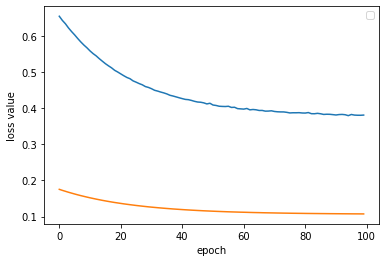

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(train_loss_history)
ax.plot(valid_loss_history)
ax.set_xlabel("epoch")
ax.set_ylabel("loss value")
ax.legend("train","valid")
plt.show()

- 검증셋 평가 및 검증셋에 대한 AUC 개선이 없을 경우 조기 종료 조건주고 모델 가중치를 저장하기

In [ ]:
is_holdout = False
for i,(tri,val) in enumerate(cv.split(features)): # 5개 빌드로 나눔
    # 학습데이터
    x_train = features[tri]
    y_train = target[tri]

    # 검증데이터
    x_valid = features[val]
    y_valid = target[val]

    model = LogisticRegression(num_features).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    tr_dt = TitanicDB(x_train,y_train)
    valid_dt = TitanicDB(x_valid,y_valid)
    
    tr_dl = torch.utils.data.DataLoader(tr_dt,batch_size=batch_size, shuffle=True) # 학습데이터
    valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size, shuffle=False) # 검증데이터


    best_score = 0
    patience = 0

    for e in range(epoch):
        train_loss = train_loop(tr_dl, model, loss_fn, optimizer, device)
        valid_loss,pred = test_loop(valid_dl, model, loss_fn, device)

        score = roc_auc_score(y_valid,pred)
        patience += 1
        if best_score < score : # 작으면
            patience = 0 
            best_score = score # 갱신
            torch.save(model.state_dict(),f"model_{i}.pth") # 저장

        if patience == 5:
            break
    print(f"{i} 번째 폴드 AUC: {best_score}")

    if is_holdout:
        break

0 번째 폴드 AUC: 0.8866397997191182
1 번째 폴드 AUC: 0.89460968875502
2 번째 폴드 AUC: 0.8813808184942206
3 번째 폴드 AUC: 0.9060355392156862
4 번째 폴드 AUC: 0.8916035353535354


In [ ]:
x_test.shape # 정답이 없는 테스트셋이라 가정

(328, 10)

- 저장된 모델 불러오고 추론하기

In [ ]:
test_dt = TitanicDB(x_test)
test_dl = torch.utils.data.DataLoader(test_dt,batch_size=batch_size,shuffle=False)

In [ ]:
pred_list=[]
for i in range(5):
    model = LogisticRegression(num_features).to(device)
    state_dict = torch.load(f"model_{i}.pth") # 가중치
    model.load_state_dict(state_dict)
    _, pred = test_loop(test_dl,model,loss_fn,device)
    pred_list.append(pred)
pred = np.mean(pred_list, axis=0)
pred

array([[0.25580636],
       [0.3271111 ],
       [0.25577852],
       [0.28720465],
       [0.5382803 ],
       [0.5383301 ],
       [0.5382803 ],
       [0.5186473 ],
       [0.4789725 ],
       [0.31662   ],
       [0.25185806],
       [0.25676543],
       [0.39457163],
       [0.6326011 ],
       [0.25727844],
       [0.5287919 ],
       [0.5351718 ],
       [0.25575578],
       [0.35272798],
       [0.26167208],
       [0.29092413],
       [0.25920573],
       [0.26782265],
       [0.26834068],
       [0.26067966],
       [0.4816062 ],
       [0.25386593],
       [0.2573369 ],
       [0.29575083],
       [0.46771106],
       [0.25646022],
       [0.52358735],
       [0.5382848 ],
       [0.27072805],
       [0.3521467 ],
       [0.311358  ],
       [0.5462607 ],
       [0.46324053],
       [0.25579077],
       [0.49922118],
       [0.32538623],
       [0.4822147 ],
       [0.5383004 ],
       [0.24952504],
       [0.41794762],
       [0.28516096],
       [0.25242087],
       [0.306